# ESERCIZIO 3

In un mercato finanziario ad ogni istante $t$ i prodotti avranno un prezzo di vendita $S(t)$. Lo sviluppo di $S(t)$ nel tempo non si può dedurre dalla sola conoscenza dei suoi valori passati--> l'evoluzione di $S(t)$ può essere approssimata utilizzando il moto browniano geometrico (ovvero un moto browniano che non può assumere valori negativi).Il moto browniano geometrico è un metodo specifico del processo di Ito, in cui la variazione di prezzo può essere espressa come $$\delta S(t)=\mu S(t)\delta t+\sigma S(t)\delta W(t)$$ 

con $\mu$ crescita media del prezzo $S(t)$,$\sigma$ fluttuazioni statistiche del prezzo e $W(t)$ processo di Wiener.
Nello specifico l'esercizio chiedeva di valutare al tempo $t=0$, attraverso dei metodi Monte-Carlo, il prezzo dell'opzione europea **Call**($C[S(0),0]$) e il prezzo dell'opzione europea **Put**($P[S(0),0]$), definite come
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$
Si è operato in due modi:
- metodo diretto, in cui si è valutato direttamente il prezzo finale $S(T)$ 
- metodo discreto, in cui si è suddiviso l'intervallo di tempo $T$ in $100$ sottointervalli, e per ogni intervallo si è valutato $S(t_i)$ fino ad arrivare a $S(T)$.
Il valore di **Call** e **Put** al tempo $0$ in questo modo sono calcolati come 

$$C\left[ S(0),0 \right]=e^{-r(T-t)}max(0,S(t)-K)$$
$$P\left[ S(0),0 \right]=e^{-r(T-t)}max(0,K-S(t))$$

Per ogni metodo ho condotto $10^5$ simulazioni e, utilizzando la media a blocchi con $N=100$, ho riportato i risultati con il relativo errore confrontandoli con il valore atteso di $C[S(0),0]$ e di $P[S(0),0]$, ovvero con i valori ottenuti dal calcolo analitico.

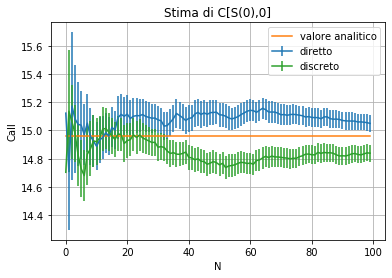

C[S(0),0]     media       errore
val_att:    14.9606      0
diretto:    15.0501      0.0575252
discreto:   14.8395      0.0595126


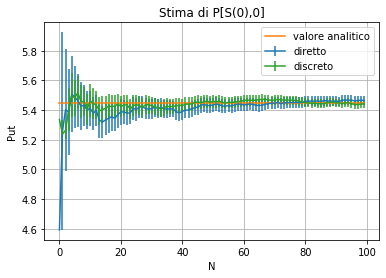

P[S(0),0]     media       errore
val_att:    5.44437      0
diretto:    5.46502      0.031589
discreto:   5.44111      0.0286216


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

direct=np.loadtxt("Call-Put_direct.dat")
discret=np.loadtxt("Call-Put_discreto.dat")
val_att=np.loadtxt("CP_attesi.dat")

x=np.arange(100)
c=val_att[0]*np.ones(100)
p=val_att[1]*np.ones(100)

#C[S(0),0] calcolato in modo analitico,diretto e discreto
plt.errorbar(x,direct[:,0],direct[:,1],label="diretto")
plt.plot(x,c,label="valore analitico")
plt.errorbar(x,discret[:,0],discret[:,1],label="discreto")
plt.xlabel("N")
plt.ylabel("Call")
plt.title("Stima di C[S(0),0]")
plt.legend()
plt.grid(True)
plt.show()
print("C[S(0),0]     media       errore")
print("val_att:    "+str(val_att[0])+"      "+str(0))
print("diretto:    "+str(direct[99,0])+"      "+str(direct[99,1]))
print("discreto:   "+str(discret[99,0])+"      "+str(discret[99,1]))



#P[S(0),0] calcolato in modo analitico,diretto e discreto
plt.errorbar(x,direct[:,2],direct[:,3],label="diretto")
plt.plot(x,p,label="valore analitico")
plt.errorbar(x,discret[:,2],discret[:,3],label="discreto")
plt.xlabel("N")
plt.ylabel("Put")
plt.title("Stima di P[S(0),0]")
plt.legend()
plt.grid(True)
plt.show()
print("P[S(0),0]     media       errore")
print("val_att:    "+str(val_att[1])+"      "+str(0))
print("diretto:    "+str(direct[99,2])+"      "+str(direct[99,3]))
print("discreto:   "+str(discret[99,2])+"      "+str(discret[99,3]))


Come si può osservare dai grafici e dalle tabelle sottostanti (in cui sono riportati il valore atteso,i valori calcolati con il metodo diretto e discreto dopo la media sugli $N$ blocchi con il relativo errore sia per **Call** che per **Put**) tra i due metodi non sussiste una particolare differenza, in quanto entrambi approssimano bene il valore atteso e hanno un errore paragonabile. Questo risultato è in linea con quanto detto sopra, ovvero che l'andamento del prezzo $S(t)$ può essere approssimato dal Moto Browniano Geometrico. una caratteristica dei processi di Wiener infatti è che ogni porzione del processo è statisticamente identica al processo intero, errori compresi, e dunque il metodo discreto e il metodo diretto sono equivalenti per la stima delle funzioni **Call** e **Put**.